In [1]:
#Import Dependencies
import pandas as pd
import csv
import matplotlib.pyplot as plt

### San Francisco Airbnb Data

In [2]:
airbnb_data = "resources/sfairbnb.csv"

In [3]:
sf_airbnb_df = pd.read_csv(airbnb_data)

In [4]:
sf_airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1B",1169,Holly,NaN,Western Addition,37.76931,-122.43386,Entire home/apt,170,1,194,5/31/2019,1.60,1,92
1,3850,Charming room for two,4921,Kevin,NaN,Inner Sunset,37.75402,-122.45805,Private room,99,1,126,7/4/2019,1.04,3,68
2,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74511,-122.42102,Entire home/apt,235,30,111,8/6/2017,0.90,1,0
3,7918,A Friendly Room - UCSF/USF - San Francisco,21994,Aaron,NaN,Haight Ashbury,37.76669,-122.45250,Private room,65,32,17,11/21/2016,0.14,9,365
4,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76487,-122.45183,Private room,65,32,8,9/12/2018,0.14,9,338


In [45]:
sf_airbnb_df[['price', 'availability_365', 'number_of_reviews']].describe()

,price,availability_365,number_of_reviews
count,7738.000000,7738.000000,7738.000000
mean,216.251486,153.019643,44.035022
std,280.334610,129.534341,75.385010
min,0.000000,0.000000,0.000000
25%,100.000000,25.000000,1.000000
50%,152.000000,129.000000,11.000000
75%,249.000000,290.000000,53.000000
max,9999.000000,365.000000,724.000000


In [5]:
sf_airbnb_df[["neighbourhood", "room_type", "price", "latitude", 'longitude', 'number_of_reviews']].head().round(decimals=2)

,neighbourhood,room_type,price,latitude,longitude,number_of_reviews
0,Western Addition,Entire home/apt,170,37.77,-122.43,194
1,Inner Sunset,Private room,99,37.75,-122.46,126
2,Bernal Heights,Entire home/apt,235,37.75,-122.42,111
3,Haight Ashbury,Private room,65,37.77,-122.45,17
4,Haight Ashbury,Private room,65,37.76,-122.45,8


In [6]:
room_type = pd.DataFrame(sf_airbnb_df.groupby(['room_type']).mean()['availability_365'])
room_type

,availability_365
room_type,
Entire home/apt,156.718478
Private room,141.337607
Shared room,220.894273


In [7]:
avg_price = pd.DataFrame(sf_airbnb_df.groupby(['room_type']).mean()['price'])
avg_price.head()

,price
room_type,
Entire home/apt,267.234106
Private room,141.534900
Shared room,84.237885


In [8]:
# Combine the data into a single dataset
merge_df = pd.merge(room_type, avg_price, on='room_type', how='left')
# Display the data table for preview
merge_df.head()

,availability_365,price
room_type,,
Entire home/apt,156.718478,267.234106
Private room,141.337607,141.534900
Shared room,220.894273,84.237885


In [9]:
merge_df['Days Booked'] = 365-merge_df['availability_365']
merge_df

,availability_365,price,Days Booked
room_type,,,
Entire home/apt,156.718478,267.234106,208.281522
Private room,141.337607,141.534900,223.662393
Shared room,220.894273,84.237885,144.105727


In [11]:
# This calculates total revenue by room_type
merge_df['Total Revenue'] = merge_df['Days Booked'] * merge_df['price']
merge_df

,availability_365,price,Days Booked,Total Revenue
room_type,,,,
Entire home/apt,156.718478,267.234106,208.281522,55659.926421
Private room,141.337607,141.534900,223.662393,31656.034514
Shared room,220.894273,84.237885,144.105727,12139.161715


In [36]:
# Optional: Data Frame with optional formatting
merge_df.style.format({"availability_365": "{:,.2f}", "price": "${:,.2f}", "Days Booked": "{:.2f}", "Total Revenue": "${:,.2f}"})

,availability_365,price,Days Booked,Total Revenue
room_type,,,,
Entire home/apt,156.72,$267.23,208.28,"$55,659.93"
Private room,141.34,$141.53,223.66,"$31,656.03"
Shared room,220.89,$84.24,144.11,"$12,139.16"


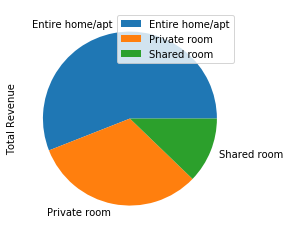

In [39]:
merge_df.plot.pie(y='Total Revenue')

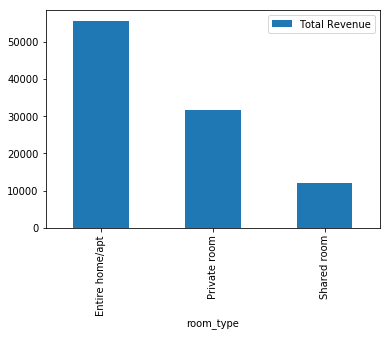

In [32]:
merge_df.plot.bar(y='Total Revenue')

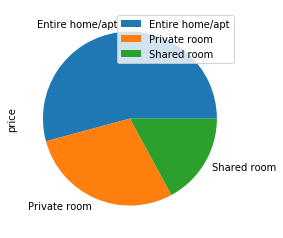

In [40]:
merge_df.plot.pie(y='price')

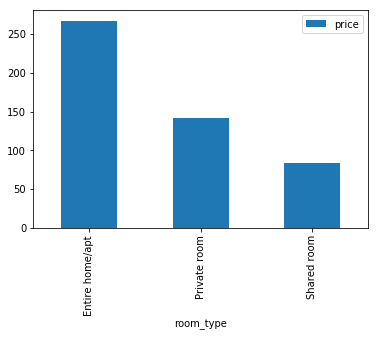

In [26]:
merge_df.plot.bar(y='price')

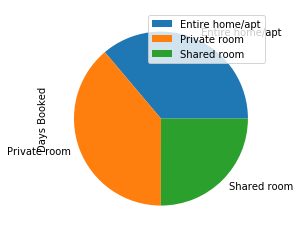

In [41]:
merge_df.plot.pie(y='Days Booked')

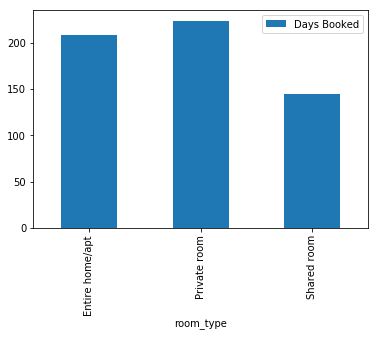

In [27]:
merge_df.plot.bar(y='Days Booked')

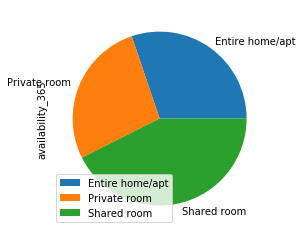

In [42]:
merge_df.plot.pie(y='availability_365')

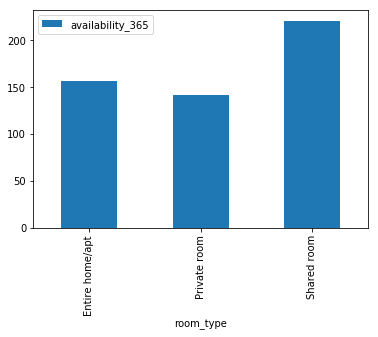

In [28]:
merge_df.plot.bar(y='availability_365')

In [15]:
avg_price = avg_price.reset_index()
avg_price

,room_type,price
0,Entire home/apt,267.234106
1,Private room,141.534900
2,Shared room,84.237885


In [16]:
avg_price.describe()

,price
count,3.000000
mean,164.335631
std,93.604536
min,84.237885
25%,112.886393
50%,141.534900
75%,204.384503
max,267.234106


In [18]:
avg_review = pd.DataFrame(sf_airbnb_df.groupby(['neighbourhood', 'price']).mean()['number_of_reviews'])
avg_review.head(500)

number_of_reviews
neighbourhood         price                   
Bayview               36             92.000000
                      39             77.000000
                      42             12.500000
                      48             11.500000
                      49             48.000000
                      50             32.000000
                      51             28.000000
                      52             20.000000
                      53              8.000000
                      55              3.333333
                      56              1.000000
                      57              8.000000
                      58              3.500000
                      59             48.166667
                      60             40.142857
                      62             88.000000
                      63             45.500000
                      64              5.000000
                      65              5.500000
                      66             17.000000
                      68             50.500000
                      69             31.000000
                      70             35.833333
                      73             21.000000
                      75             18.000000
                      76            321.000000
                      77              0.000000
                      78             96.500000
                      79             17.000000
                      80              3.000000
...                                        ...
Diamond Heights       140            19.000000
                      158             5.000000
                      159           134.000000
                      164            16.000000
                      170           188.000000
                      188            59.000000
                      200             1.000000
                      225             6.000000
                      230           108.000000
                      285            54.000000
                      295             5.000000
                      390            59.000000
                      495             3.000000
Downtown/Civic Center 19              0.500000
                      27              0.000000
                      28              0.000000
                      29              0.000000
                      32              5.000000
                      36              0.000000
                      37              0.000000
                      38              0.000000
                      39              0.000000
                      40             31.666667
                      45              2.000000
                      46              5.000000
                      49              1.000000
                      53              6.000000
                      54              7.000000
                      55              0.444444
                      59              0.000000

[500 rows x 1 columns]

<function matplotlib.pyplot.show(*args, **kw)>

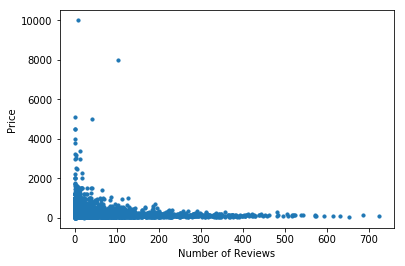

In [19]:
plt.scatter(sf_airbnb_df['number_of_reviews'], sf_airbnb_df['price'], marker='o', s=10)
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show

### Redfin MLS San Francisco Data (Current Listings)

In [20]:
mls_df = pd.read_csv("resources/sfrealestate_72219.csv")

In [21]:
mls_df

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,Redfin Data,NaN,Single Family Residential,515 Munich St,San Francisco,CA,94112,925000,3.0,2.0,...,Pre On-Market,NaN,NaN,http://www.redfin.com/CA/San-Francisco/515-Mun...,Coming Soon,38596,N,Y,37.717422,-122.429239
1,Redfin Data,NaN,Single Family Residential,76 Homestead St,San Francisco,CA,94114,1,4.0,3.0,...,Pre On-Market,NaN,NaN,http://www.redfin.com/CA/San-Francisco/76-Home...,Coming Soon,38781,N,Y,37.749760,-122.439856
2,Redfin Data,NaN,Condo/Co-op,333 Main St Unit 8F,San Francisco,CA,94105,895000,1.0,1.0,...,Pre On-Market,NaN,NaN,http://www.redfin.com/CA/San-Francisco/333-Mai...,Coming Soon,39150,N,Y,37.789131,-122.391020
3,MLS Listing,NaN,Vacant Land,886 Moultrie St,San Francisco,CA,94110,2100000,NaN,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/886-Mou...,San Francisco MLS,441005,N,Y,37.733315,-122.416504
4,MLS Listing,NaN,Vacant Land,202 Union St,San Francisco,CA,94133,500000,NaN,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/202-Uni...,San Francisco MLS,453033,N,Y,37.801341,-122.402947
5,MLS Listing,NaN,Condo/Co-op,1450 Post St #316,San Francisco,CA,94109,400000,1.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/1450-Po...,San Francisco MLS,465790,N,Y,37.786361,-122.425831
6,MLS Listing,NaN,Multi-Family (5+ Unit),285 Turk St,San Francisco,CA,94102,14750000,11.0,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/285-Tur...,San Francisco MLS,471185,N,Y,37.782710,-122.413806
7,MLS Listing,NaN,Single Family Residential,3225 Ingalls St,San Francisco,CA,94124,799000,2.0,2.0,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/3225-In...,San Francisco MLS,471608,N,Y,37.718662,-122.393133
8,MLS Listing,NaN,Multi-Family (5+ Unit),381 Turk St,San Francisco,CA,94102,7150000,3.0,NaN,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/381-Tur...,San Francisco MLS,473898,N,Y,37.782407,-122.415263
9,MLS Listing,NaN,Condo/Co-op,2000 Washington St #5,San Francisco,CA,94109,17500000,4.0,3.5,...,Active,NaN,NaN,http://www.redfin.com/CA/San-Francisco/2000-Wa...,San Francisco MLS,475321,N,Y,37.792936,-122.426463


In [22]:
mls_df[["PROPERTY TYPE", "BEDS", "PRICE", "LATITUDE", 'LONGITUDE']].head().round(decimals=2)

,PROPERTY TYPE,BEDS,PRICE,LATITUDE,LONGITUDE
0,Single Family Residential,3.0,925000,37.72,-122.43
1,Single Family Residential,4.0,1,37.75,-122.44
2,Condo/Co-op,1.0,895000,37.79,-122.39
3,Vacant Land,NaN,2100000,37.73,-122.42
4,Vacant Land,NaN,500000,37.80,-122.40


In [23]:
mls_avg_price = pd.DataFrame(mls_df.groupby(['PROPERTY TYPE', 'BEDS']).mean()['PRICE'].round(decimals=2))
mls_avg_price

PRICE
PROPERTY TYPE             BEDS             
Condo/Co-op               0.0     488776.06
                          1.0     927156.98
                          2.0    2019577.78
                          3.0    2605356.31
                          4.0    4972666.60
                          5.0    7400000.00
Multi-Family (2-4 Unit)   1.0    2595000.00
                          2.0    2866666.33
                          3.0    2576800.00
                          4.0    2495294.06
                          5.0    2228411.76
                          6.0    2243640.47
                          7.0    2773000.00
                          8.0    2535000.00
                          9.0    1499800.00
                          10.0   4958333.33
                          11.0   2800000.00
                          14.0   3995000.00
Multi-Family (5+ Unit)    2.0    4200000.00
                          3.0    4083750.00
                          4.0    3312500.00
                          5.0    2178333.33
                          6.0    1750000.00
                          8.0    4150000.00
                          9.0    6008800.00
                          10.0   3722500.00
                          11.0   8850000.00
                          12.0   2868800.00
                          13.0   3947500.00
                          14.0   4547500.00
                          16.0   7325000.00
                          17.0   6197500.00
                          22.0   5950000.00
                          44.0   8000000.00
                          45.0  32000000.00
Other                     1.0     995000.00
                          2.0    1778999.67
                          5.0    3749000.00
                          6.0    2198000.00
                          8.0    2950000.00
                          12.0   4888888.00
Single Family Residential 0.0    2800000.00
                          1.0     828380.00
                          2.0    1461336.75
                          3.0    1817635.21
                          4.0    3196902.47
                          5.0    3076811.03
                          6.0    9329181.82
                          7.0   14395000.00
                          9.0   30000000.00
Townhouse                 2.0    1166896.60
                          3.0    2154375.00
                          4.0    2495000.00

In [24]:
mls_avg_price.describe().round(decimals=0)

,PRICE
count,53.0
mean,4723662.0
std,5827277.0
min,488776.0
25%,2198000.0
50%,2868800.0
75%,4888888.0
max,32000000.0
